In [1]:
import sys
sys.path.append("../")
sys.path.append("../../../assets")

# Get rid of annoying tf warning
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import bayesflow as beef
import pandas as pd

from experiments import NonStationaryDDMExperiment
from models import RandomWalkDDM

/home/divergence/anaconda3/envs/bfPower/lib/python3.10/site-packages/bayesflow/trainers.py:26: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
# gpu setting and checking
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Constants

In [4]:
TRAIN_NETWORKS = True

NUM_SAMPLES = 2000

PARAM_LABELS = ['Drift rate', 'Threshold', 'Non-decision time']
PARAM_NAMES  = [r'$v$', r'$a$', r'$\tau$']
FONT_SIZE_1 = 22
FONT_SIZE_2 = 20
FONT_SIZE_3 = 18

In [5]:
model = RandomWalkDDM()
experiment = NonStationaryDDMExperiment(model, checkpoint_path="../checkpoints/mixture_random_walk_ddm")

INFO:root:Performing 2 pilot runs with the random_walk_ddm model...
INFO:root:Shape of parameter batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:Shape of simulation batch after 2 pilot simulations: (batch_size = 2, 800)
INFO:root:Shape of hyper_prior_draws batch after 2 pilot simulations: (batch_size = 2, 3)
INFO:root:Shape of local_prior_draws batch after 2 pilot simulations: (batch_size = 2, 800, 3)
INFO:root:No shared_prior_draws provided.
INFO:root:No optional simulation batchable context provided.
INFO:root:No optional simulation non-batchable context provided.
INFO:root:No optional prior batchable context provided.
INFO:root:No optional prior non-batchable context provided.
INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


# Training

In [6]:
if TRAIN_NETWORKS:
    history = experiment.run(
        epochs=75, 
        iterations_per_epoch=1000, 
        batch_size=16
    )
else:
    history = experiment.trainer.loss_history.get_plottable()

Training epoch 1:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 2:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 3:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 4:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 5:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 6:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 7:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 8:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 9:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 10:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 11:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 12:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 13:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 14:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 15:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 16:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 17:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 18:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 19:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 20:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 21:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 22:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 23:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 24:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 25:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 26:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 27:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 28:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 29:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 30:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 31:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 32:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 33:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 34:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 35:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 36:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 37:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 38:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 39:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 40:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 41:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 42:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 43:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 44:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 45:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 46:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 47:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 48:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 49:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 50:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 51:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 52:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 53:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 54:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 55:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 56:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 57:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 58:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 59:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 60:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 61:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 62:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 63:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 64:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 65:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 66:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 67:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 68:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 69:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 70:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 71:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 72:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 73:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 74:   0%|          | 0/1000 [00:00<?, ?it/s]

Training epoch 75:   0%|          | 0/1000 [00:00<?, ?it/s]

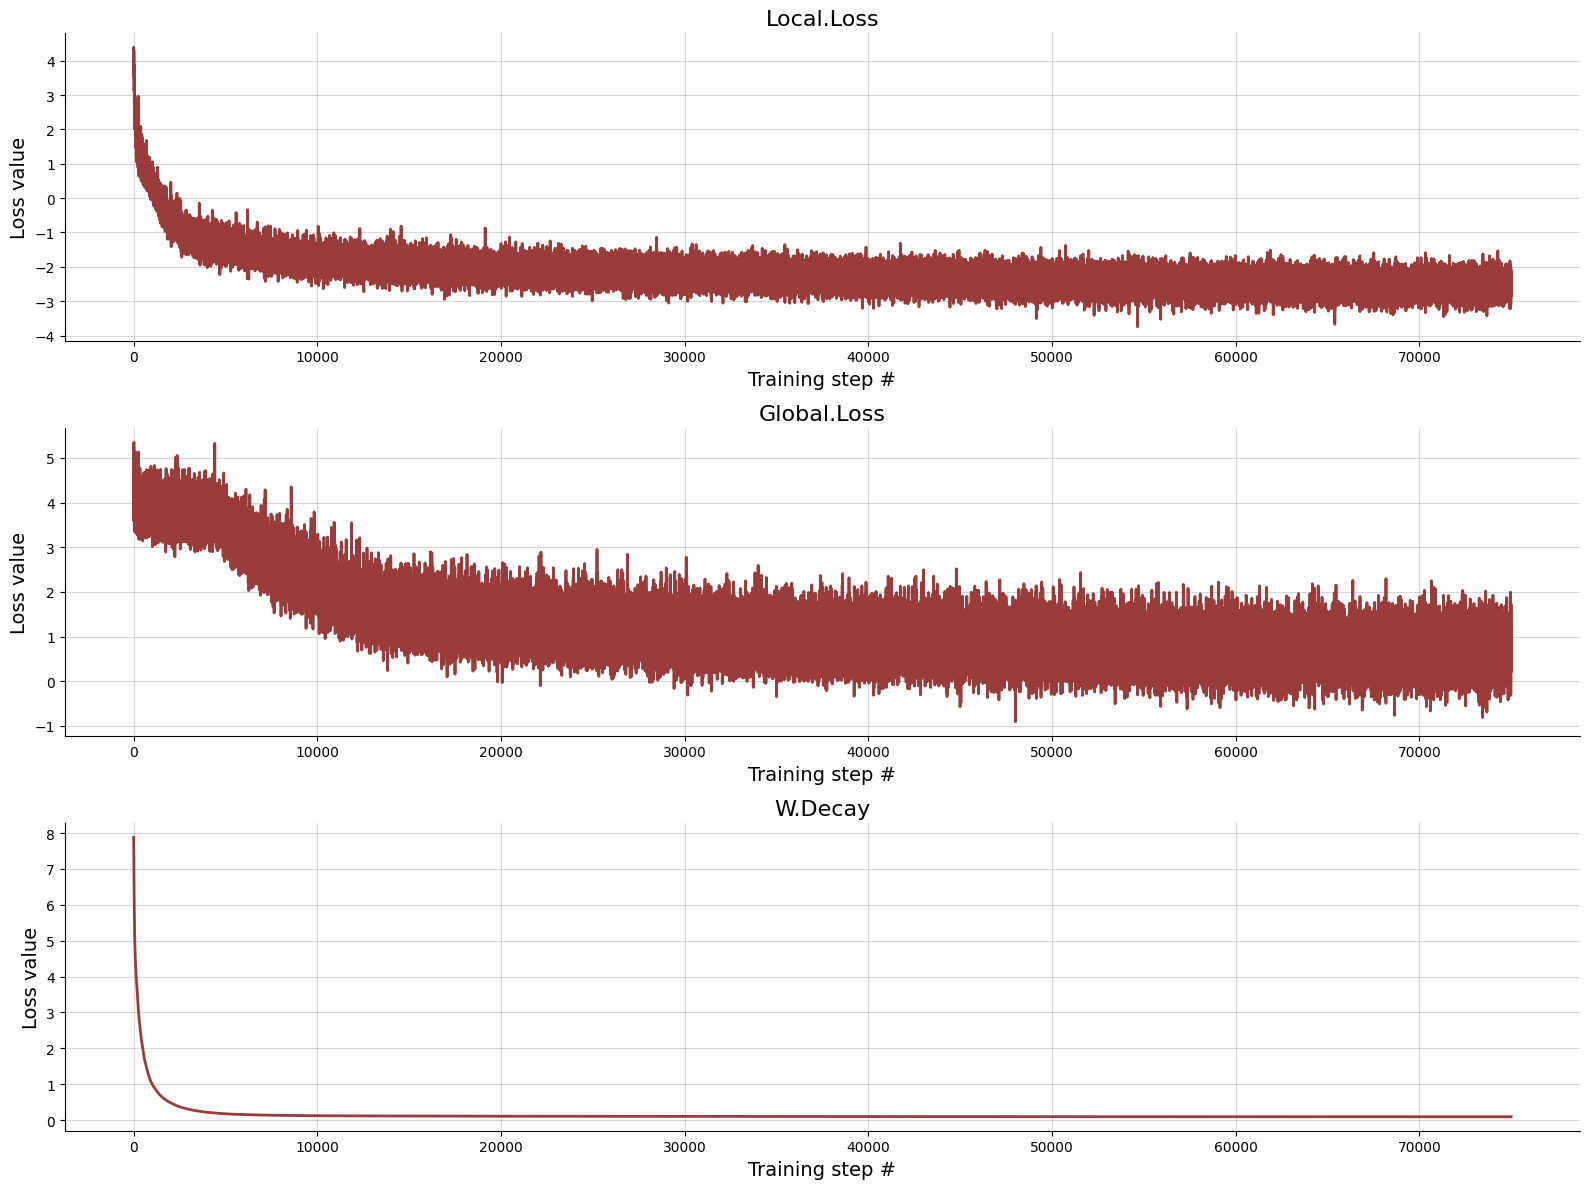

In [7]:
f = beef.diagnostics.plot_losses(history)

# Evaluation

## Calibration Error

## Parameter Recovery

# Parameter Estimation

In [ ]:
data = pd.read_csv(
    '../data/data_color_discrimination.csv',
    )
data['rt'][data['correct'] == 0] = -(data['rt'][data['correct'] == 0])
data.head()